In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 15.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.4 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [2]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

isimler ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'cheekPuff', 'cheekSquintLeft', 'cheekSquintRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInLeft', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeLookUpLeft', 'eyeLookUpRight', 'eyeSquintLeft', 'eyeSquintRight', 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthDimpleLeft', 'mouthDimpleRight', 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLeft', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPressLeft', 'mouthPressRight', 'mouthPucker', 'mouthRight', 'mouthRollLower', 'mouthRollUpper', 'mouthShrugLower', 'mouthShrugUpper', 'mouthSmileLeft', 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight', 'noseSneerLeft', 'noseSneerRight']


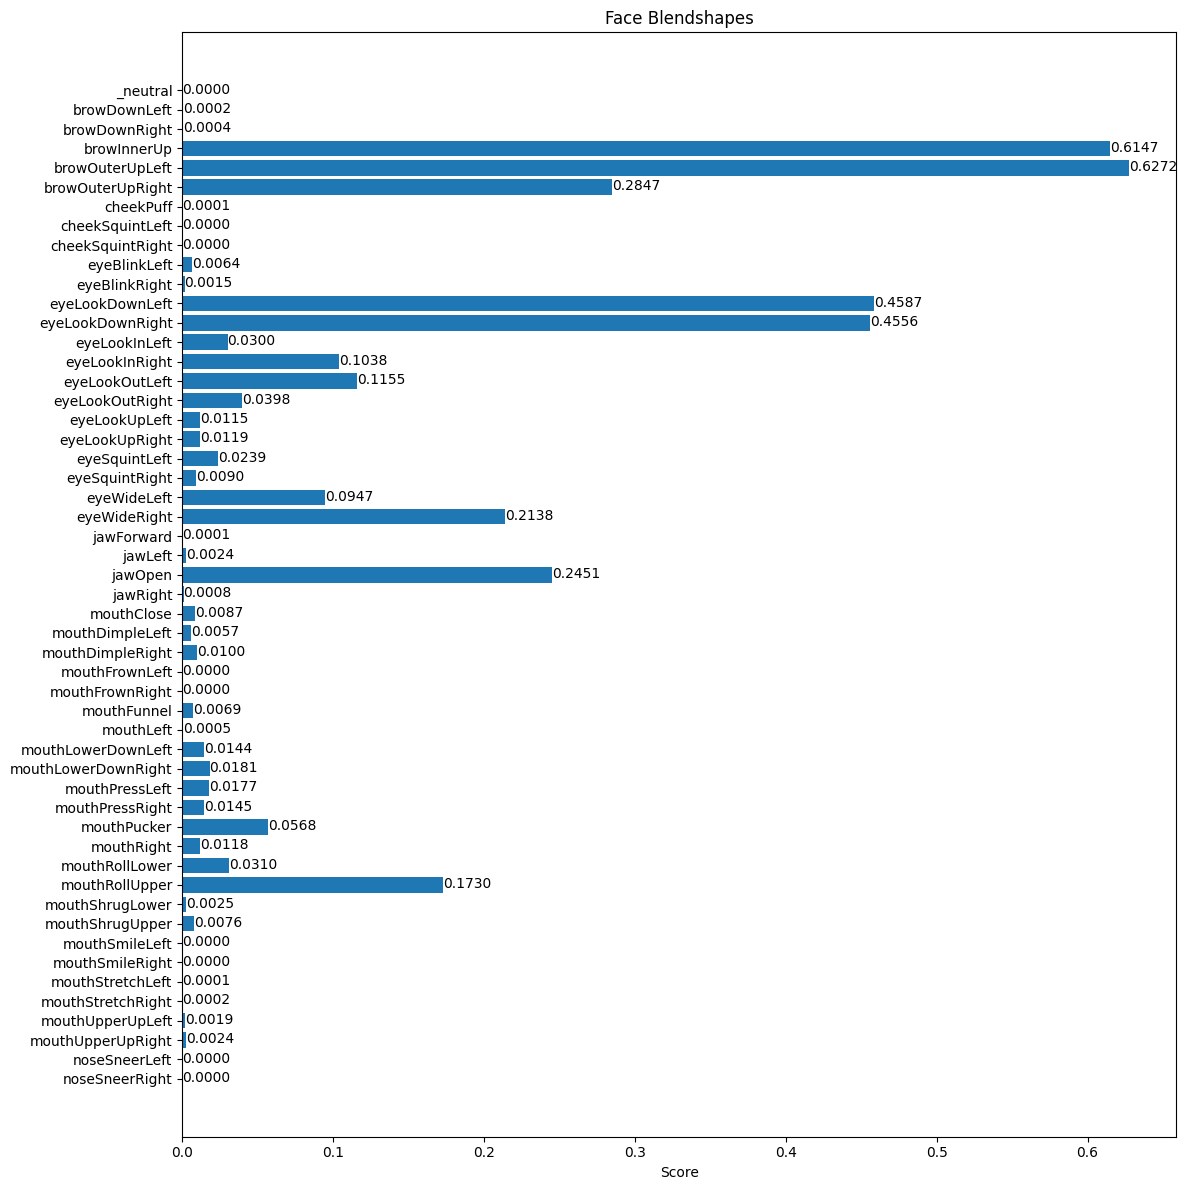

In [48]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [20]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.92205501e-01, -6.04903474e-02,  1.08946197e-01,
         1.18711746e+00],
       [ 9.10740122e-02,  9.48733926e-01, -3.02671373e-01,
         2.23701134e+01],
       [-8.50522369e-02,  3.10234487e-01,  9.46847558e-01,
        -6.80049210e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]


PROJEM

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [24]:
# Define a mapping from blendshapes to basic emotions
EMOTION_MAPPING = { "happy": ["mouthSmileLeft", "mouthSmileRight", "cheekPuff"],
                   "sad": ["mouthFrownLeft", "mouthFrownRight", "eyeLookDownLeft", "eyeLookDownRight"],
                    "angry": ["browDownLeft", "browDownRight", "mouthPressLeft", "mouthPressRight"],
                    "disgusted": ["noseWrinkleLeft", "noseWrinkleRight", "mouthFrownLeft", "mouthFrownRight", "browDownLeft", "browDownRight"],
                    "neutral": ["_neutral"],
                    "surprised": ["browInnerUp", "browOuterUpLeft", "browOuterUpRight", "eyeWideLeft", "eyeWideRight", "mouthOpen"],
                    "contempt": ["mouthUpperUpLeft", "mouthUpperUpRight", "noseWrinkleLeft", "noseWrinkleRight"]
 }

In [124]:
my_image = '/content/sss.jpg'

In [25]:

# Function to estimate emotion based on blendshape scores
def estimate_emotion(face_blendshapes):
    emotion_scores = {emotion: 0.0 for emotion in EMOTION_MAPPING.keys()}

    for blendshape in face_blendshapes:
        for emotion, related_blendshapes in EMOTION_MAPPING.items():
            if blendshape.category_name in related_blendshapes:
                emotion_scores[emotion] += blendshape.score

    # Get the emotion with the highest score
    dominant_emotion = max(emotion_scores, key=emotion_scores.get)
    return emotion_scores, dominant_emotion

In [26]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

Estimated Emotion: surprised


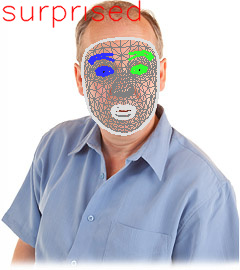

In [130]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a FaceLandmarker object
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# Load the input image (replace 'my_image' with your image path)  # Update this path
image = mp.Image.create_from_file(my_image)

# Detect face landmarks from the input image
detection_result = detector.detect(image)

# Estimate emotion
emotion_scores, dominant_emotion = estimate_emotion(detection_result.face_blendshapes[0])
print(f"Estimated Emotion: {dominant_emotion}")

# Font settings for OpenCV text
font = cv2.FONT_HERSHEY_SIMPLEX
org = (0, 20)  # Top-left corner of the text
fontScale = 1
color = (255, 0, 0)  # Blue color in BGR
thickness = 1

# Process the detection result and visualize it
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

# Add text to the image
annotated_image = cv2.putText(annotated_image, dominant_emotion, org, font,
                              fontScale, color, thickness, cv2.LINE_AA)

# Display the image using cv2_imshow in Colab
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

VİDEO İLE DUYGU ANALİZİ

In [27]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow
import numpy as np

# Create a FaceLandmarker object
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)


# Open the video file
input_video_path = '/content/Detecting emotions from faces.mp4'  # Update this path
output_video_path = 'analiz_videosuu.mp4'  # Update this path

cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

    # Detect face landmarks from the frame
    detection_result = detector.detect(mp_image)

    if detection_result.face_blendshapes:
        # Estimate emotion
        emotion_scores, dominant_emotion = estimate_emotion(detection_result.face_blendshapes[0])

        # Font settings for OpenCV text
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (10, 30)  # Top-left corner of the text
        fontScale = 1
        color = (255, 0, 0)  # Blue color in BGR
        thickness = 2

        # Annotate the frame
        annotated_frame = draw_landmarks_on_image(rgb_frame, detection_result)
        annotated_frame = cv2.putText(annotated_frame, dominant_emotion, org, font,
                                      fontScale, color, thickness, cv2.LINE_AA)

        # Convert back to BGR and write to video
        annotated_frame_bgr = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)
        out.write(annotated_frame_bgr)

        # Display the frame using cv2_imshow in Colab
        #cv2_imshow(annotated_frame_bgr)
    else:
        out.write(frame)  # If no faces detected, just write the original frame

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
